<a href="https://colab.research.google.com/github/flinkflora17/ML_kurzus/blob/main/masodikalkalom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Szívbetegség klasszifikálás

In [1]:
file_url = "http://storage.googleapis.com/download.tensorflow.org/data/heart.csv"

In [25]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataframe = pd.read_csv(file_url)

In [4]:
dataframe.shape

(303, 14)

In [5]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,fixed,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,normal,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,reversible,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,normal,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,normal,0


In [7]:
dataframe.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [10]:
labeler = LabelEncoder()

In [11]:
labeler.fit(dataframe.thal)

LabelEncoder()

In [13]:
dataframe.thal = labeler.transform(dataframe.thal)

In [14]:
# egy lépésben: 
# dataframe.thal = labeler.fit_transform(...)

In [15]:
dataframe.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4,0
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [16]:
y_df = dataframe.target

In [17]:
y_df.head()

0    0
1    1
2    0
3    0
4    0
Name: target, dtype: int64

In [18]:
# töröljük az utsó oszlopot
x_df = dataframe.copy().drop('target', axis = 1)

In [19]:
x_df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,1,145,233,1,2,150,0,2.3,3,0,2
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3
2,67,1,4,120,229,0,2,129,1,2.6,2,2,4
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3


In [29]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size = 0.1, shuffle = True)

In [23]:
x_train.shape

(272, 13)

In [24]:
x_test.shape

(31, 13)

## Adat normalizálás

In [30]:
normalizer = StandardScaler()

In [31]:
normalizer.fit(x_train)
#itt most csak "megtanulta", hogy mennyi a várható érték és a szórás

StandardScaler()

In [32]:
x_train = normalizer.transform(x_train)
# itt alkalmazzuk

In [34]:
x_train
pd.DataFrame(x_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.262796,0.697380,0.894656,1.126131,0.518686,-0.415227,-0.985624,-2.612861,1.470643,0.121607,0.638707,0.374104,1.163873
1,-0.067622,0.697380,-1.044359,3.356662,0.689787,-0.415227,1.045358,1.959331,-0.679975,-0.914755,-0.969888,0.374104,1.163873
2,-1.609574,0.697380,0.894656,1.126131,-0.450888,-0.415227,-0.985624,1.361101,-0.679975,-0.914755,-0.969888,-0.720049,1.163873
3,0.483075,0.697380,-2.013867,2.129870,0.784843,-0.415227,1.045358,0.421024,-0.679975,-0.742028,0.638707,-0.720049,1.163873
4,-1.169016,0.697380,0.894656,-0.658294,-1.477496,-0.415227,-0.985624,-0.219938,1.470643,1.503423,2.247301,-0.720049,-2.083035
...,...,...,...,...,...,...,...,...,...,...,...,...,...
267,-0.728459,0.697380,0.894656,-0.435241,0.518686,-0.415227,1.045358,0.720139,-0.679975,-0.482937,0.638707,-0.720049,1.163873
268,-0.728459,0.697380,-1.044359,-0.100661,-0.032641,-0.415227,1.045358,1.318370,-0.679975,-0.742028,0.638707,-0.720049,-0.459581
269,-0.067622,-1.433939,-0.074852,1.572237,-0.869136,-0.415227,-0.985624,0.591947,-0.679975,-0.914755,-0.969888,0.374104,-0.459581
270,1.364190,0.697380,0.894656,-0.658294,-0.336821,-0.415227,1.045358,-0.860899,1.470643,1.330696,0.638707,1.468257,1.163873


In [39]:
x_test = normalizer.transform(x_test)
pd.DataFrame(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-6.753657,-24.886564,-9.631693,-7.782728,-4.781267,-14.244974,-4.035055,-6.656993,-12.050999,-2.586876,-17.435264,-3.313101,-29.996913
1,-6.751008,-4.252089,-7.864700,-7.782825,-4.781264,49.314408,-4.035055,-6.657143,-12.050999,-2.920665,-17.435264,0.986557,-23.050512
2,-6.749978,-4.252089,-8.748197,-7.782651,-4.781266,49.314408,-4.035055,-6.657186,-12.050999,-1.752403,-10.739710,-1.879882,-36.943314
3,-6.750420,-4.252089,-9.631693,-7.782612,-4.781266,-14.244974,-1.908217,-6.657090,-12.050999,-2.976297,-17.435264,-3.313101,-23.050512
4,-6.749243,-24.886564,-8.748197,-7.782516,-4.781254,-14.244974,-4.035055,-6.657190,-12.050999,-2.865034,-17.435264,-3.313101,-23.050512
5,-6.749831,-24.886564,-8.748197,-7.782883,-4.781253,-14.244974,-4.035055,-6.657100,-12.050999,-2.976297,-17.435264,-1.879882,-29.996913
6,-6.751597,-4.252089,-7.864700,-7.782612,-4.781261,49.314408,-1.908217,-6.657133,9.341072,-2.976297,-17.435264,-0.446662,-23.050512
7,-6.750273,-4.252089,-8.748197,-7.782419,-4.781273,-14.244974,-4.035055,-6.657053,-12.050999,-2.086192,-17.435264,-3.313101,-29.996913
8,-6.749390,-4.252089,-7.864700,-7.782612,-4.781261,-14.244974,-1.908217,-6.657143,-12.050999,-2.197455,-10.739710,-1.879882,-23.050512
9,-6.747771,-24.886564,-9.631693,-7.782709,-4.781259,-14.244974,-1.908217,-6.657230,9.341072,-2.865034,-17.435264,-1.879882,-29.996913


In [37]:
# normalizer = StandardScaler()
# x_train = normalizer.fit_transform(x_train)
# x_test = normalizer.transform(x_test)

## Architektúra létrehozása

In [55]:
from tensorflow.keras.layers import Input, Dense
import keras
from tensorflow.keras.utils import plot_model
from tensorflow.keras.metrics import BinaryAccuracy

In [50]:
input = Input(shape = (x_train.shape[1]))
# csak előre megy az info, minden mindennel össze van kötve 
x = Dense(32, activation = 'relu')(input)
x = Dense(64, activation = 'relu')(x)
output = Dense(1, activation = 'sigmoid')(x)

In [51]:
model = keras.Model(input, output)

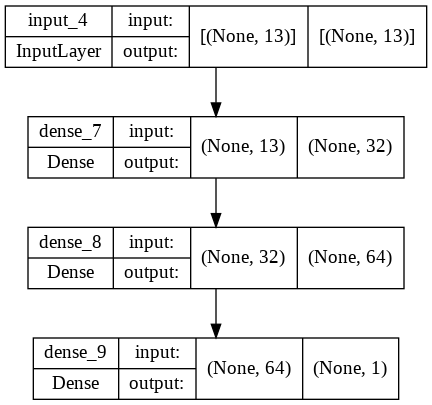

In [52]:
plot_model(model, show_shapes = True)

In [58]:
model.compile(loss = 'binary_crossentropy', metrics = [BinaryAccuracy()])

In [59]:
model.fit(x = x_train, y = y_train, epochs = 50)

Epoch 1/50
9/9 [==============================] - 2s 6ms/step - loss: 0.5853 - binary_accuracy: 0.7463
Epoch 2/50
9/9 [==============================] - 0s 7ms/step - loss: 0.4867 - binary_accuracy: 0.8235
Epoch 3/50
9/9 [==============================] - 0s 8ms/step - loss: 0.4280 - binary_accuracy: 0.8419
Epoch 4/50
9/9 [==============================] - 0s 5ms/step - loss: 0.3860 - binary_accuracy: 0.8419
Epoch 5/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3552 - binary_accuracy: 0.8603
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3328 - binary_accuracy: 0.8787
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3164 - binary_accuracy: 0.8603
Epoch 8/50
9/9 [==============================] - 0s 4ms/step - loss: 0.3050 - binary_accuracy: 0.8676
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 0.2958 - binary_accuracy: 0.8750
Epoch 10/50
9/9 [==============================] - 0s 4ms/step - loss: 0.

In [60]:
model.predict(x_test)

array([[0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [5.1691147e-35],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [3.9039488e-29],
       [3.0095461e-34],
       [3.2022556e-32],
       [0.0000000e+00],
       [2.8219949e-32],
       [4.0474800e-37],
       [0.0000000e+00],
       [0.0000000e+00],
       [2.8705741e-30],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [0.0000000e+00],
       [7.1726239e-31],
       [0.0000000e+00],
       [0.0000000e+00]], dtype=float32)

In [61]:
model.evaluate(x = x_test, y = y_test)

1/1 [==============================] - 0s 322ms/step - loss: 35.1393 - binary_accuracy: 0.5806


[35.13927459716797, 0.5806451439857483]